#### Деревья решений

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
import time

1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

In [61]:
data = load_iris()
y = data.target
X = data.data[:, 2:]

In [4]:
X.shape, y.shape

((150, 2), (150,))

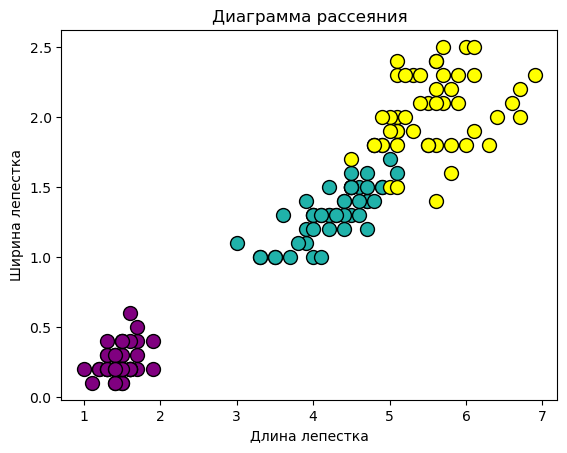

In [5]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='purple', edgecolor='black', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='lightseagreen', edgecolor='black', s=100)
plt.scatter(X[:, 0][y==2], X[:, 1][y==2], c='yellow', edgecolor='black', s=100)

plt.title(f"Диаграмма рассеяния")
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.show()

2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz

In [6]:
depth=4
RANDOM_SEED=3

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, 
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=3)

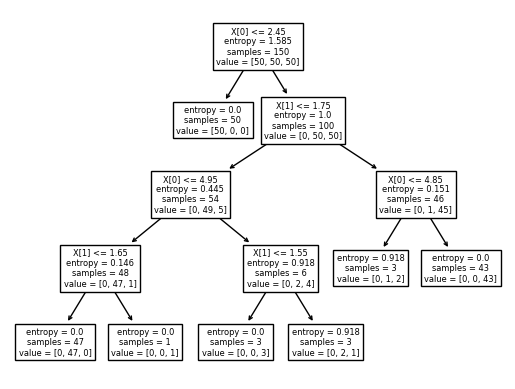

In [11]:
plot_tree(clf_tree) 
plt.show()

In [16]:
print(export_text(clf_tree))

|--- feature_0 <= 2.45
|   |--- class: 0
|--- feature_0 >  2.45
|   |--- feature_1 <= 1.75
|   |   |--- feature_0 <= 4.95
|   |   |   |--- feature_1 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_0 >  4.95
|   |   |   |--- feature_1 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  1.55
|   |   |   |   |--- class: 1
|   |--- feature_1 >  1.75
|   |   |--- feature_0 <= 4.85
|   |   |   |--- class: 2
|   |   |--- feature_0 >  4.85
|   |   |   |--- class: 2



In [24]:
print(export_graphviz(clf_tree))

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[0] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[1] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="X[0] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="X[1] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]"] ;
3 -> 4 ;
5 [label="entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]"] ;
4 -> 5 ;
6 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
4 -> 6 ;
7 [label="X[1] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]"] ;
3 -> 7 ;
8 [label="entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
7 -> 8 ;
9 [label="entropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]"] ;
7 -> 9 ;
10 [label="X[0] <= 4.85\nent

3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_absolute_error

In [48]:
def plot_tree_clf(X, y, model):
    X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
    X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
    X0_grid, X1_grid = np.meshgrid(X0, X1)

    y_predict = model.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
    plt.pcolormesh(X0_grid, X1_grid, y_predict)

    plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

    plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(model.max_depth))
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

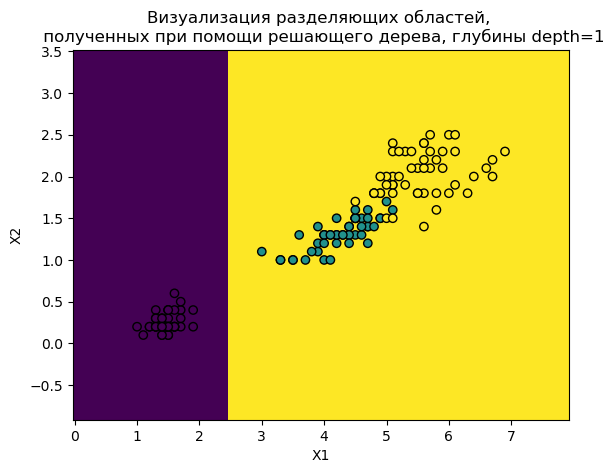

Accuracy = 0.667


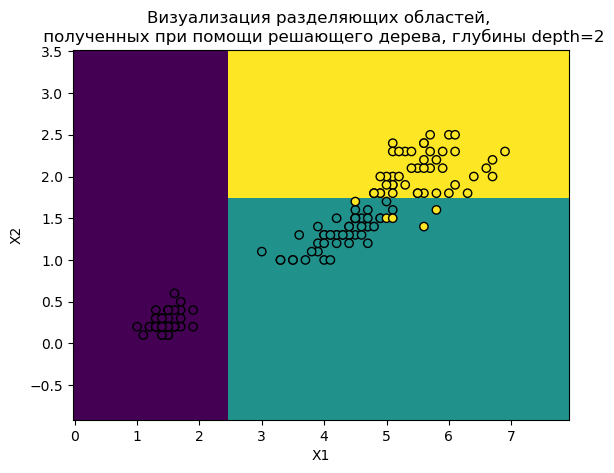

Accuracy = 0.96


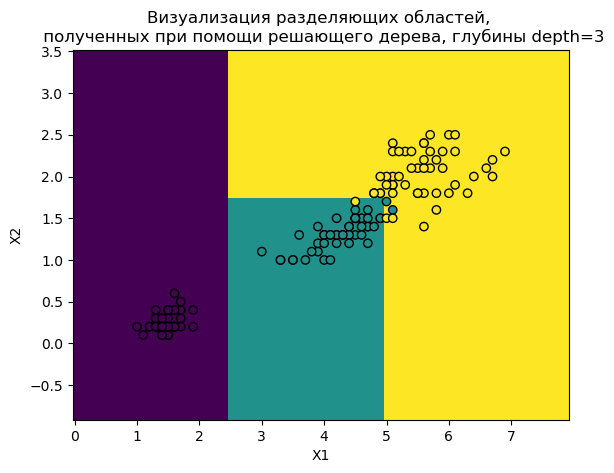

Accuracy = 0.973


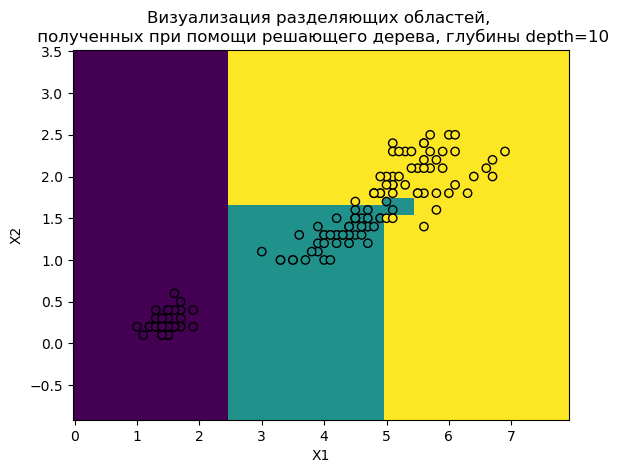

Accuracy = 0.993


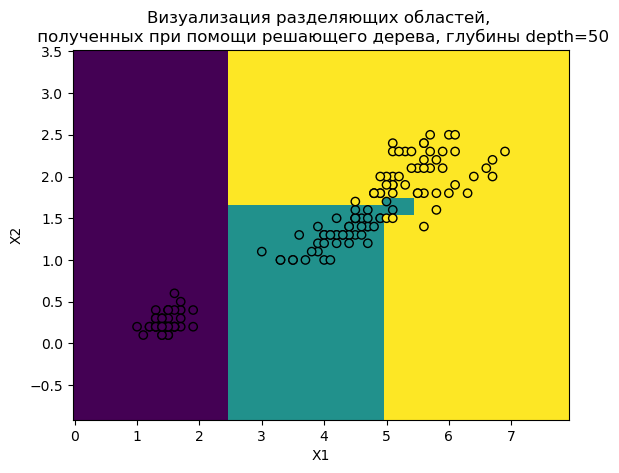

Accuracy = 0.993


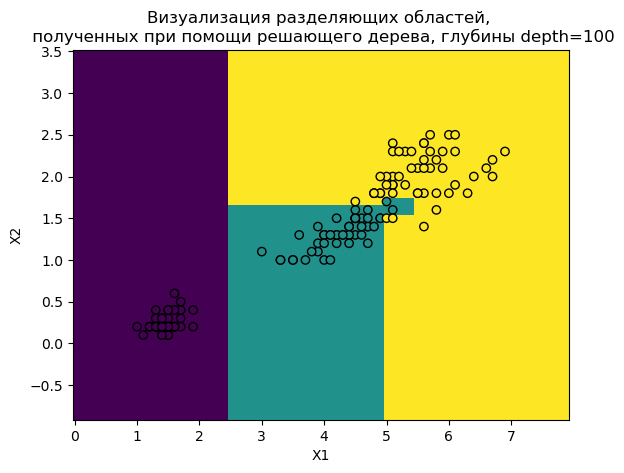

Accuracy = 0.993


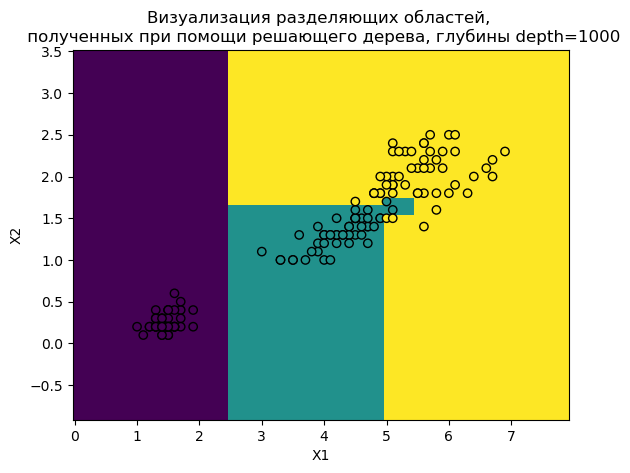

Accuracy = 0.993


In [69]:
depth = [1, 2, 3, 10, 50, 100, 1000]
RANDOM_SEED=3

for i, d in enumerate(depth):
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=RANDOM_SEED)
    clf_tree.fit(X, y)
    
    plot_tree_clf(X, y, clf_tree)
    
    y_pred = clf_tree.predict(X)
    print('Accuracy =', accuracy_score(y, y_pred).round(3))

4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

In [67]:
depth = [1, 2, 3, 10, 50, 100, 1000]
RANDOM_SEED=3

for d in depth:
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=RANDOM_SEED)
    clf_tree.fit(X, y)
    
    y_pred = clf_tree.predict(X)
    
    print(f'Матрица классификации для дерева с глубиной {d}')
    print(confusion_matrix(y, y_pred))
    print(f'Accuracy = {accuracy_score(y, y_pred).round(3)}\n')

Матрица классификации для дерева с глубиной 1
[[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]
Accuracy = 0.667

Матрица классификации для дерева с глубиной 2
[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]
Accuracy = 0.96

Матрица классификации для дерева с глубиной 3
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
Accuracy = 0.973

Матрица классификации для дерева с глубиной 10
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]
Accuracy = 0.993

Матрица классификации для дерева с глубиной 50
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]
Accuracy = 0.993

Матрица классификации для дерева с глубиной 100
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]
Accuracy = 0.993

Матрица классификации для дерева с глубиной 1000
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]
Accuracy = 0.993



5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

In [56]:
y_iris = data.target
X_iris = data.data

In [70]:
depth=4
RANDOM_SEED=3

clf_tree_iris = DecisionTreeClassifier(criterion='entropy', max_depth=depth, 
                                  random_state=RANDOM_SEED)
clf_tree_iris.fit(X_iris, y_iris)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=3)

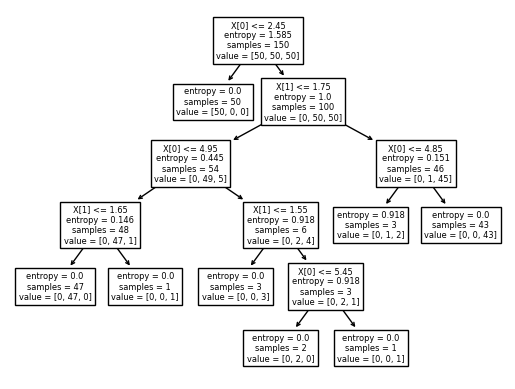

In [71]:
plot_tree(clf_tree) 
plt.show()

In [74]:
y_pred_iris = clf_tree_iris.predict(X_iris)

print(f'Матрица классификации для дерева с глубиной 4')
print(confusion_matrix(y_iris, y_pred_iris))
print(f'Accuracy = {accuracy_score(y, y_pred).round(3)}')

Матрица классификации для дерева с глубиной 4
[[50  0  0]
 [ 0 50  0]
 [ 0  1 49]]
Accuracy = 0.993


6. Загрузите встроенные данные fetch_california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
d = fetch_california_housing(download_if_missing=True)

In [107]:
print(d.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [60]:
X_house_all, y_house = fetch_california_housing(return_X_y=True)
X_house_bed = X_house_all[:, 2].reshape(y_house.shape[0], -1)

In [97]:
X_house_bed.shape, y_house.shape

((20640,), (20640,))

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit(X_house_bed)
X_scaled = scaler.transform(X_house_bed)

In [12]:
mscaler = MinMaxScaler(feature_range=(0, 5))
X_mscaled = mscaler.fit(X_house_bed)
X_mscaled = mscaler.transform(X_house_bed)

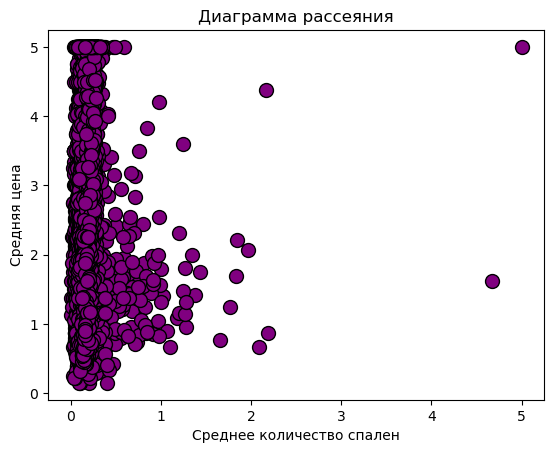

In [13]:
plt.scatter(X_mscaled, y_house, c='purple', edgecolor='black', s=100)

plt.title(f"Диаграмма рассеяния")
plt.xlabel('Среднее количество спален')
plt.ylabel('Средняя цена')
plt.show()

7. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [20]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [21]:
reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(X_house_bed, y_house)

DecisionTreeRegressor(random_state=0)

8. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

In [118]:
plot_tree(reg_tree)

[Text(0.7687721566077609, 0.9932432432432432, 'X[0] <= 6.374\nsquared_error = 1.332\nsamples = 20640\nvalue = 2.069'),
 Text(0.5888713853150455, 0.9797297297297297, 'X[0] <= 5.789\nsquared_error = 1.029\nsamples = 16953\nvalue = 1.882'),
 Text(0.4368139025887504, 0.9662162162162162, 'X[0] <= 5.478\nsquared_error = 0.983\nsamples = 14080\nvalue = 1.826'),
 Text(0.2827929737684581, 0.9527027027027027, 'X[0] <= 3.044\nsquared_error = 0.963\nsamples = 12065\nvalue = 1.805'),
 Text(0.026668089656590413, 0.9391891891891891, 'X[0] <= 3.036\nsquared_error = 1.033\nsamples = 484\nvalue = 1.998'),
 Text(0.019384591938934586, 0.9256756756756757, 'X[0] <= 2.598\nsquared_error = 1.018\nsamples = 479\nvalue = 1.987'),
 Text(0.010494702290422694, 0.9121621621621622, 'X[0] <= 1.667\nsquared_error = 1.138\nsamples = 211\nvalue = 2.065'),
 Text(0.008994570413239845, 0.8986486486486487, 'X[0] <= 1.628\nsquared_error = 0.406\nsamples = 16\nvalue = 1.641'),
 Text(0.008750147951073659, 0.8851351351351351, '

Error in callback <function flush_figures at 0x000001C8942295E0> (for post_execute):


KeyboardInterrupt: 

Text(0, 0.5, 'y')

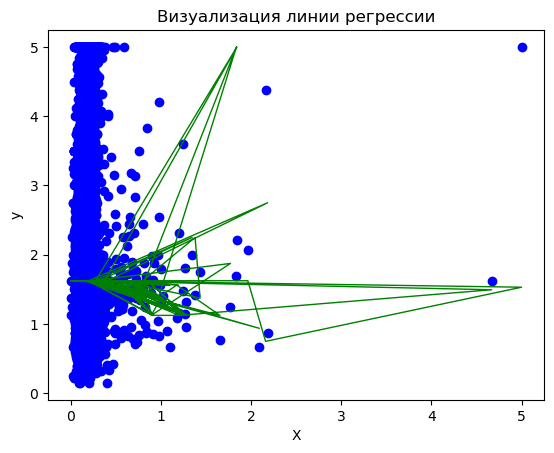

In [31]:
y_pred_house = reg_tree.predict(X_mscaled)
plt.scatter(X_mscaled, y_house, c="b")

plt.plot(X_mscaled, y_pred_house, "g", lw=1)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y')

9. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [25]:
print('r2 =', r2_score(y_house, y_pred_house).round(3))
print('MAE =', mean_absolute_error(y_house, y_pred_house).round(3))

r2 = 0.954
MAE = 0.061


In [55]:
observe_obj = [[1, 3], [2, 2], [4.3, 3.8]]

[ 15 874]
[81 81]
[8251 4069]


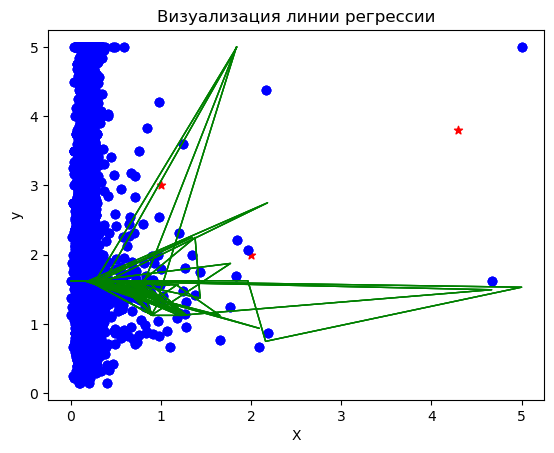

In [59]:
for point in observe_obj:
    plt.scatter(X_mscaled, y_house, c="b")
    plt.scatter(point[0], point[1], marker='*', c='red')

    plt.plot(X_mscaled, y_pred_house, "g", lw=1)

    plt.title('Визуализация линии регрессии')
    plt.xlabel('X')
    plt.ylabel('y')
    
    print(reg_tree.apply(np.array(point).reshape(-1, 1)))

10. Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

In [61]:
reg_tree_all = DecisionTreeRegressor(random_state=0)
reg_tree_all.fit(X_house_all, y_house)

y_pred_all = reg_tree_all.predict(X_house_all)
print('r2 =', r2_score(y_house, y_pred_all).round(3))
print('MAE =', mean_absolute_error(y_house, y_pred_all).round(3))

r2 = 1.0
MAE = 0.0


In [62]:
plot_tree(reg_tree_all)

[Text(0.645635247336683, 0.9878048780487805, 'X[0] <= 5.035\nsquared_error = 1.332\nsamples = 20640\nvalue = 2.069'),
 Text(0.3639938881027397, 0.9634146341463414, 'X[0] <= 3.074\nsquared_error = 0.837\nsamples = 16255\nvalue = 1.735'),
 Text(0.17050728144690835, 0.9390243902439024, 'X[2] <= 4.314\nsquared_error = 0.561\nsamples = 7860\nvalue = 1.357'),
 Text(0.07790901565119027, 0.9146341463414634, 'X[0] <= 2.215\nsquared_error = 0.67\nsamples = 3317\nvalue = 1.62'),
 Text(0.032687156370252074, 0.8902439024390244, 'X[2] <= 3.324\nsquared_error = 0.57\nsamples = 1753\nvalue = 1.373'),
 Text(0.013635685116608526, 0.8658536585365854, 'X[5] <= 3.129\nsquared_error = 0.87\nsamples = 526\nvalue = 1.82'),
 Text(0.007560361549368697, 0.8414634146341463, 'X[4] <= 1209.5\nsquared_error = 1.13\nsamples = 267\nvalue = 2.07'),
 Text(0.004525805819547524, 0.8170731707317073, 'X[6] <= 37.505\nsquared_error = 0.894\nsamples = 146\nvalue = 1.775'),
 Text(0.002928410046086034, 0.7926829268292683, 'X[6]

Error in callback <function flush_figures at 0x000002BC776718B0> (for post_execute):


KeyboardInterrupt: 

### Доп. задания

1. Проверьте работу модели на ненормализованных данных с очень разной величиной. Сделайте вывод о применимости модели дерева решений без нормализации

In [6]:
from sklearn.datasets import make_blobs

In [50]:
blob_centers = ([1, 1], [5, 5], [1.8, 3.3], [3.5, 2])
X_gen, y_gen = make_blobs(n_samples=300, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)

X_gen[:, 0] *= 10000

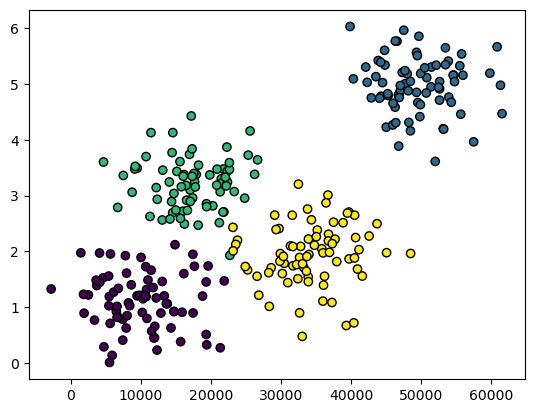

In [51]:
plt.scatter(X_gen[:, 0], X_gen[:, 1], c=y_gen,  edgecolors='black', linewidth=1)

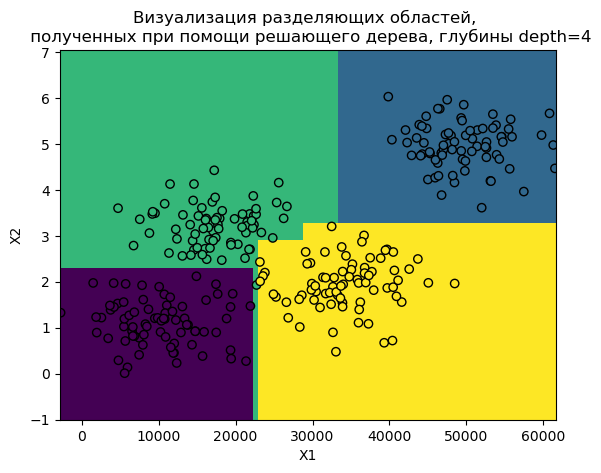

Матрица классификации для дерева с глубиной 4
[[75  0  0  0]
 [ 0 75  0  0]
 [ 0  0 75  0]
 [ 0  0  0 75]]
Accuracy = 1.0



In [54]:
clf_tree_gen = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf_tree_gen.fit(X_gen, y_gen)

plot_tree_clf(X_gen, y_gen, clf_tree_gen)

y_pred_gen = clf_tree_gen.predict(X_gen)

print(f'Матрица классификации для дерева с глубиной {clf_tree_gen.max_depth}')
print(confusion_matrix(y_gen, y_pred_gen))
print(f'Accuracy = {accuracy_score(y_gen, y_pred_gen).round(3)}\n')

4. Используйте на первом датасете вместо деревьев решений случайный лес. Визуализируйте его границу принятия решений.

In [57]:
from sklearn.ensemble import RandomForestClassifier

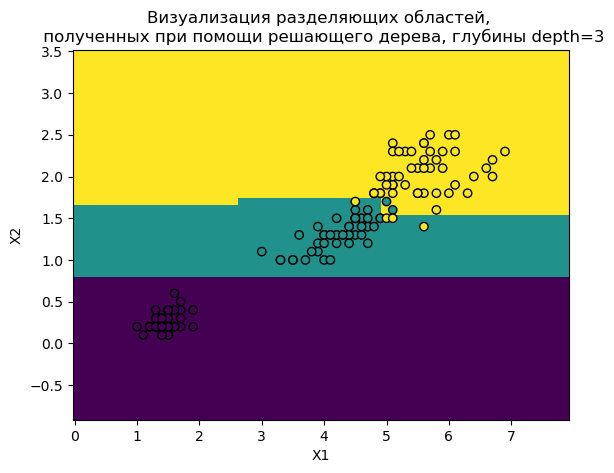

Матрица классификации для дерева с глубиной 3
[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]
Accuracy = 0.953



In [76]:
forest_clf = RandomForestClassifier(n_estimators=3, criterion='entropy', max_depth=3, 
                                    min_samples_split=3, min_samples_leaf=2, random_state=0)
forest_clf.fit(X, y)

plot_tree_clf(X, y, forest_clf)

y_pred_forest = forest_clf.predict(X)

print(f'Матрица классификации для дерева с глубиной {forest_clf.max_depth}')
print(confusion_matrix(y, y_pred_forest))
print(f'Accuracy = {accuracy_score(y, y_pred_forest).round(3)}\n')